# Data import and test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
name_data_file="heart_failure_clinical_records_dataset"

data = pd.read_csv(f"../raw_data/{name_data_file}.csv", na_values=["?"])

In [4]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
print(data.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [6]:
data.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
data.groupby("DEATH_EVENT").head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
14,49.0,1,80,0,30,1,427000.00,1.0,138,0,0,12,0
20,65.0,1,52,0,25,1,276000.00,1.3,137,0,0,16,0
23,53.0,0,63,1,60,0,368000.00,0.8,135,1,0,22,0
33,50.0,1,159,1,30,0,302000.00,1.2,138,0,0,29,0
38,60.0,0,2656,1,30,0,305000.00,2.3,137,1,0,30,0


In [8]:
#just to check data 

#  continuous vs binary attributes 
continuous_cols = ["age",
    "creatinine_phosphokinase",  # technically int, but continuous range
    "ejection_fraction",         # technically int, but continuous range
    "platelets",
    "serum_creatinine",
    "serum_sodium",              # technically int, but continuous range
    "time"                       # follow-up time, treated as continuous
]

# binary columns
binary_cols = [
    "anaemia", "diabetes", "high_blood_pressure",
    "sex", "smoking", "DEATH_EVENT"
]

# just to check: binary columns should only contain {0,1} values
for col in binary_cols:
    uniq = set(data[col].unique())
    if not uniq.issubset({0,1}):
        print(f"[WARN] {col} has unexpected values outside {{0,1}}: {uniq}")

In [18]:
# Continuous variables: mean, median, std, min, max
print(data[continuous_cols].describe().T)

# Binary variables: frequency counts
for col in binary_cols:
    print(f"\n{col} value counts:")
    print(data[col].value_counts(normalize=True) * 100)



                          count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
time                      299.0     130.260870     77.614208      4.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
ejection_fraction             30.0      38.0      45.0      80.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium 

In [10]:
# Keep binary columns as int for correlations later
# If needed, we can also cast them to category for specific plots
binary_as_cat = {col: data[col].astype("category") for col in binary_cols}

In [11]:
# check missing values (expected 0, but had to confirm) 
missing_counts = data.isna().sum()
print("\nMissing values per column:\n", missing_counts)


Missing values per column:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [12]:
# NOTE:
# Boxplots highlight statistical outliers (values far from the majority, e.g. > 1.5×IQR).
# These may be valid but extreme cases (e.g. age 95).
#
# Plausibility checks flag logically impossible or highly unlikely values 
# based on domain knowledge (e.g. negative age, ejection fraction > 100, sodium = 500).
#
# => Boxplots = statistical anomalies
# => Plausibility rules = domain-based anomalies

#  Plausibility rules (just flags, not removing data here) -> some references he should be included for the range of "valid" intervals of data!! @martini
range_rules = {
    "age": (0, 120),
    "ejection_fraction": (1, 100),
    "creatinine_phosphokinase": (0, None),  # should be non-negative
    "platelets": (0, None),                  # should be non-negative
    "serum_creatinine": (0, None),           # should be non-negative
    "serum_sodium": (100, 200),              # conservative physiological interval
    "time": (0, None)                        # should be non-negative
}

def out_of_range_mask(series, low, high):
    mask = pd.Series(False, index=series.index)
    if low is not None:
        mask |= series < low
    if high is not None:
        mask |= series > high
    return mask

range_issues = {}
for col, (lo, hi) in range_rules.items():
    mask = out_of_range_mask(data[col], lo, hi)
    n_bad = int(mask.sum())
    if n_bad > 0:
        range_issues[col] = n_bad
        print(f"[FLAG] {col}: {n_bad} values outside expected range ({lo}, {hi}).")

if not range_issues:
    print("No simple range anomalies detected.")


No simple range anomalies detected.


# Data Visualization plots

In [13]:
X = data.drop(columns=["DEATH_EVENT"])
y = data["DEATH_EVENT"]  # stays as 0/1 integer

X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


## Boxplots (for continuous variables)

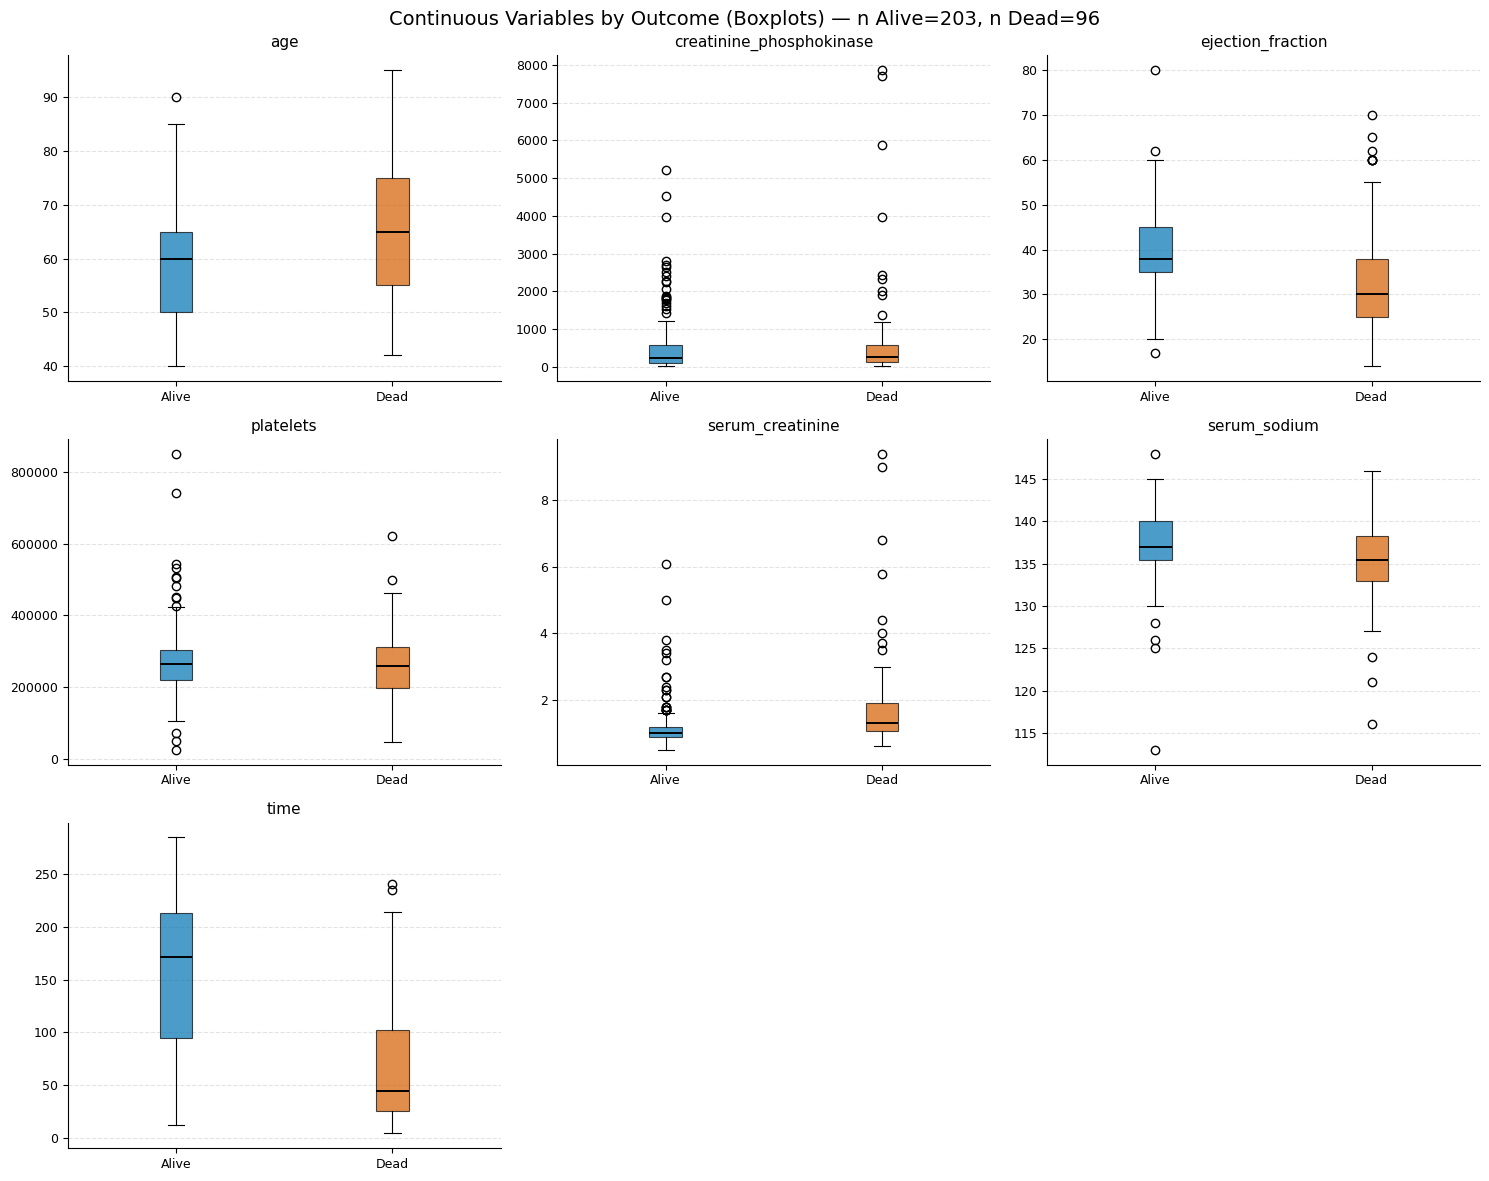

In [14]:
# continuous attributes for boxplots (already defined above, but repeating here for clarity)
continuous_cols = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]

# Split by DEATH_EVENT (0 = Alive, 1 = Dead)
groups = {label: subset for label, subset in data.groupby("DEATH_EVENT")}
labels = ["Alive", "Dead"]  # clearer than "(0)/(1)"

# Colorblind-safe for emphasis on comparison
colors = ["#0072B2", "#D55E00"]  # we can choose other palettes but careful with the guidelines

fig, axs = plt.subplots(3, 3, figsize=(15, 12))
axs = axs.flatten()

# Minimalist style (Tufte): remove chartjunk, keep focus on data
for ax in axs:
    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(0.8)
    ax.spines["bottom"].set_linewidth(0.8)
    ax.grid(axis="y", linestyle="--", alpha=0.35)

for idx, col in enumerate(continuous_cols):
    bp = axs[idx].boxplot([groups[0][col], groups[1][col]], tick_labels=labels, patch_artist=True)               
    
    # fill boxes with consistent, meaningful color (Tufte and ACCENT guidelines)
    for patch, c in zip(bp["boxes"], colors):
        patch.set_facecolor(c)
        patch.set_alpha(0.70)
        patch.set_edgecolor("black")
        patch.set_linewidth(0.8)

    # thin whiskers/caps; dark median for readability
    for whisker in bp["whiskers"]:
        whisker.set(color="black", linewidth=0.8)
    for cap in bp["caps"]:
        cap.set(color="black", linewidth=0.8)
    for median in bp["medians"]:
        median.set(color="black", linewidth=1.4)

    axs[idx].set_title(col, fontsize=11)
    axs[idx].tick_params(axis="x", labelsize=9)
    axs[idx].tick_params(axis="y", labelsize=9)

# remove unused axes
for j in range(len(continuous_cols), len(axs)):
    fig.delaxes(axs[j])

# Add concise, informative title and a note with n per group (context!)
n_alive, n_dead = len(groups[0]), len(groups[1])
fig.suptitle(
    f"Continuous Variables by Outcome (Boxplots) — n Alive={n_alive}, n Dead={n_dead}", fontsize=14)

plt.tight_layout()
plt.show()

In [15]:
data["DEATH_EVENT"].unique()

array([1, 0])

## Matrix Scatter Plot

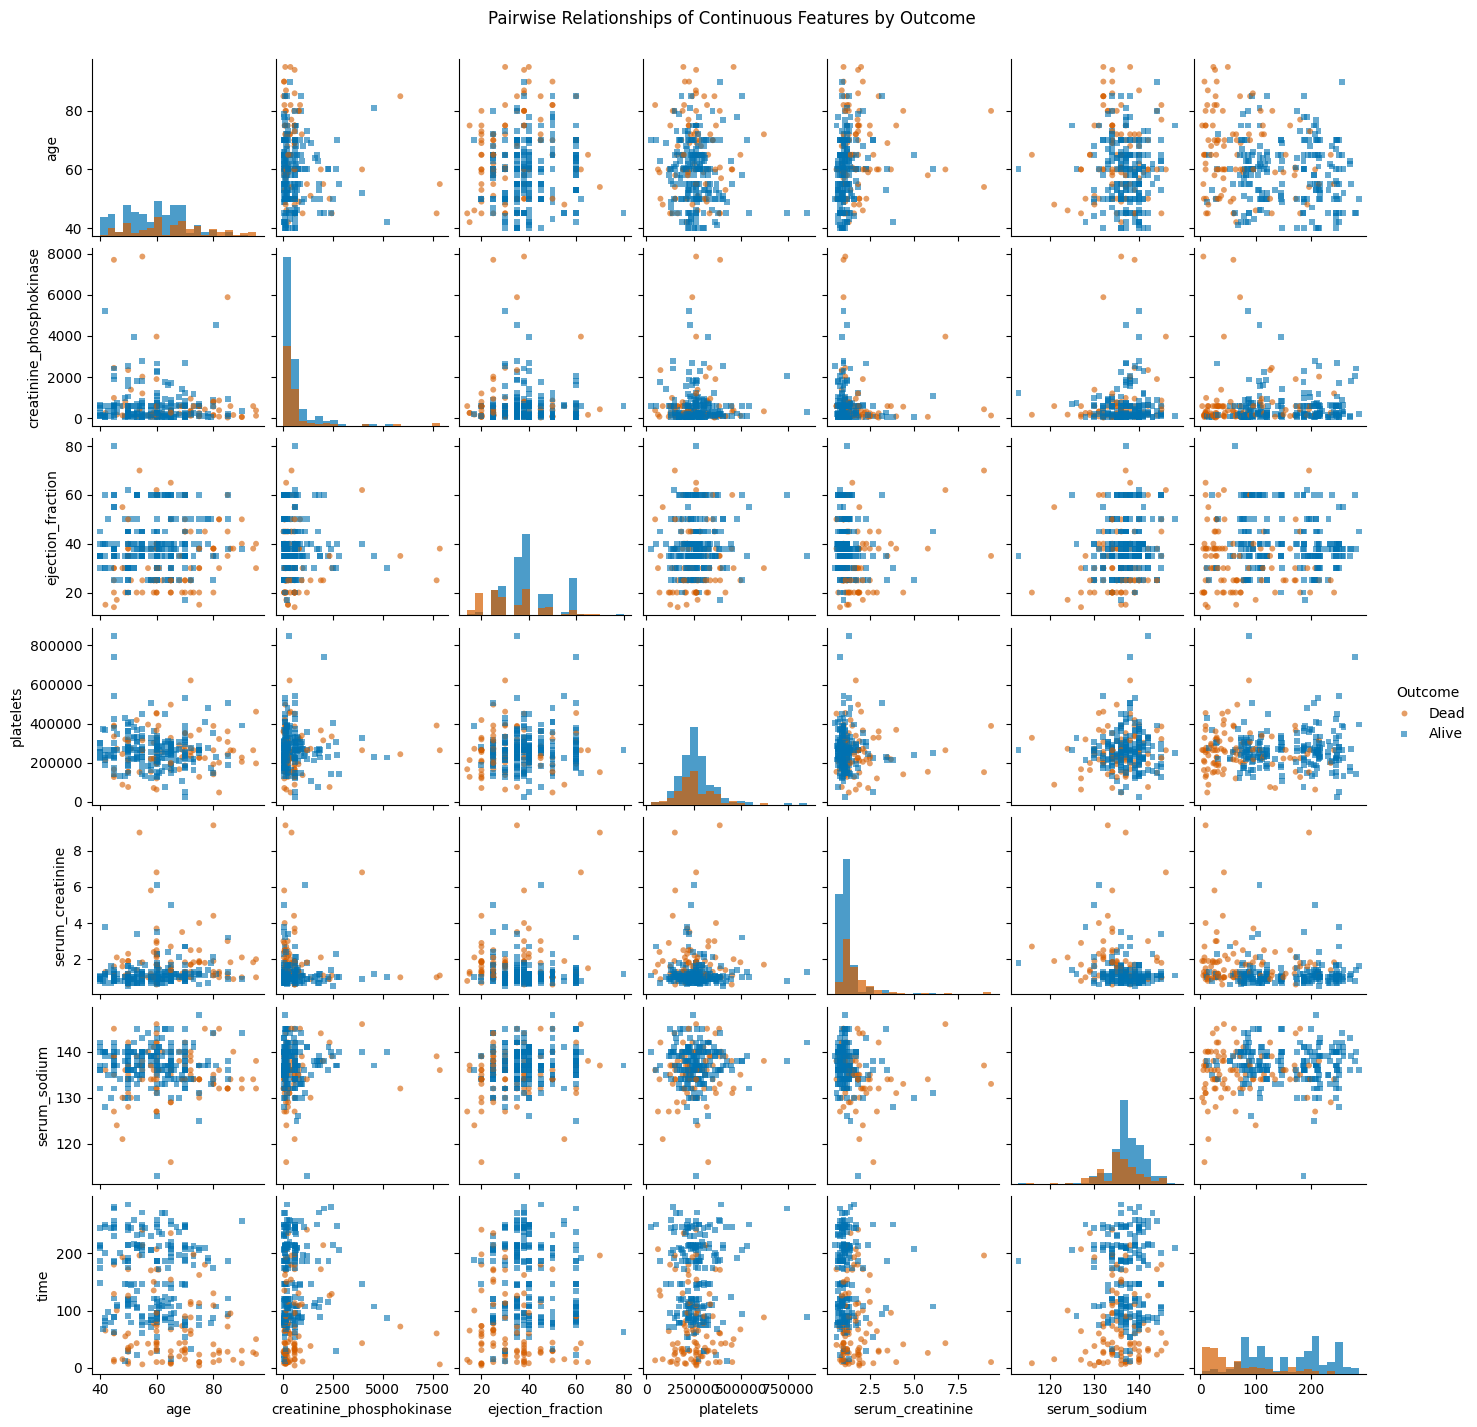

In [16]:
continuous_cols = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]

data_pair = data.copy()
data_pair["Outcome"] = data_pair["DEATH_EVENT"].map({0: "Alive", 1: "Dead"})

# palette for two classes
palette = {"Alive": "#0072B2", "Dead": "#D55E00"}

g = sns.pairplot(data_pair[continuous_cols + ["Outcome"]], hue="Outcome", diag_kind="hist", markers=["o", "s"], palette=palette, height=2.0,
plot_kws=dict(alpha=0.6, s=18, edgecolor="none"), diag_kws=dict(alpha=0.7, edgecolor="none", bins=20))
g.fig.suptitle("Pairwise Relationships of Continuous Features by Outcome", y=1.02)
plt.show()

### Matrix Scatter Plot of selected features

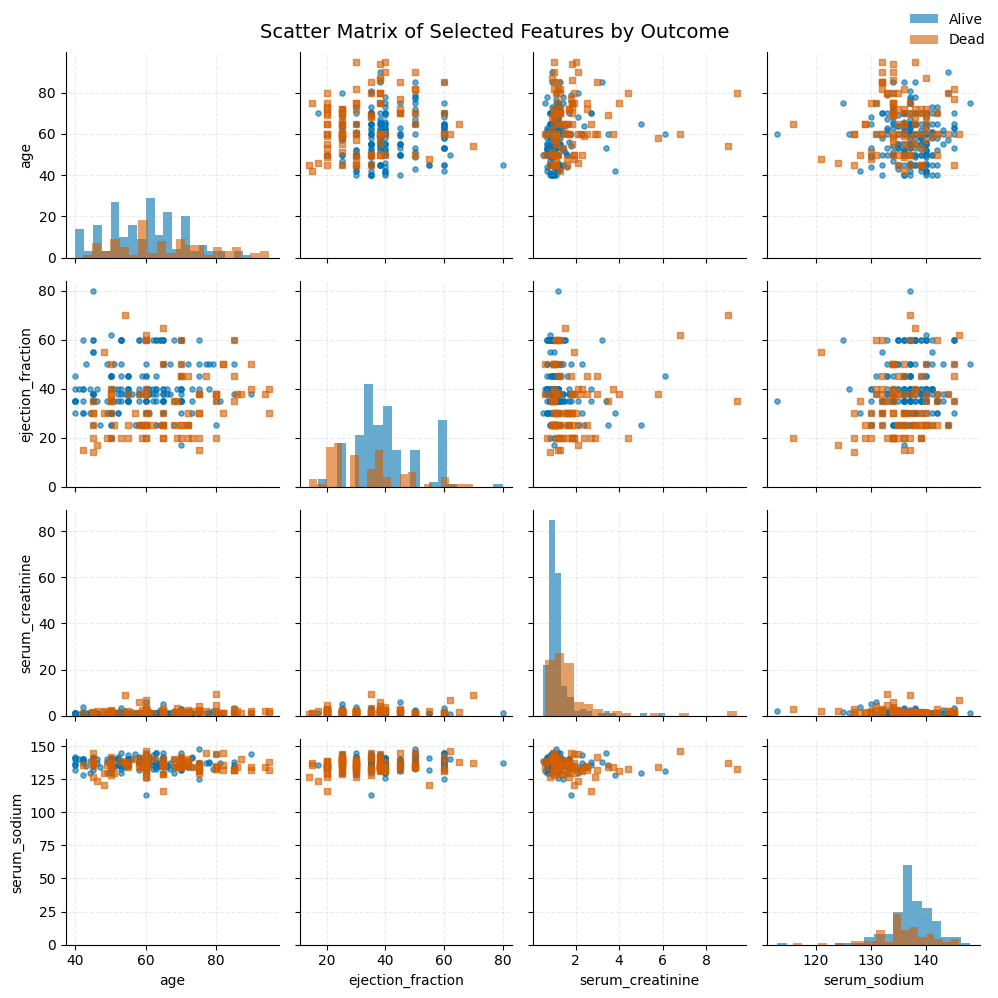

In [17]:
# Choose a subset for a 4×4 matrix
features = ["age", "ejection_fraction", "serum_creatinine", "serum_sodium"] #test features

label_map = {0: "Alive", 1: "Dead"}
df_plot = data.copy()
df_plot["Outcome"] = df_plot["DEATH_EVENT"].map(label_map)

colors = {"Alive": "#0072B2", "Dead": "#D55E00"}  
markers = {"Alive": "o", "Dead": "s"}

fig, axs = plt.subplots(4, 4, figsize=(10, 10), sharex='col', sharey='row')
fig.suptitle("Scatter Matrix of Selected Features by Outcome", fontsize=14)

for i, row_feat in enumerate(features):
    for j, col_feat in enumerate(features):
        ax = axs[i, j]
        ax.set_facecolor("white")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.grid(axis="both", linestyle="--", alpha=0.25)

        if i == j:
            # Diagonal: histogram per class
            for outcome, sub in df_plot.groupby("Outcome"):
                ax.hist(sub[row_feat], bins=20, alpha=0.6, label=outcome if j == 0 else None,  # only first diag col gets labels
                        edgecolor="none", color=colors[outcome])
        else:
            # Off-diagonal: scatter colored by class
            for outcome, sub in df_plot.groupby("Outcome"):
                ax.scatter(sub[col_feat], sub[row_feat], alpha=0.6, s=14, c=colors[outcome], marker=markers[outcome], 
                        label=outcome if (i == 0 and j == 0) else None)

        if j == 0:
            ax.set_ylabel(row_feat)
        if i == len(features) - 1:
            ax.set_xlabel(col_feat)

# Add a single legend (grab from first axis with labels)
handles, labels = axs[0, 0].get_legend_handles_labels()
if handles:
    fig.legend(handles, labels, loc="upper right", frameon=False)

plt.tight_layout()
plt.show()

### Outliers count (3.1)

In [45]:
# outliers: IQR & Z-SCORE 

# functions to calculate IQR interval and z-score outliers
def iqr_outlier_mask(s: pd.Series, k: float = 1.5) -> pd.Series:
    """
    IQR criterion. -> [Q1 - k*IQR; Q3 + k*IQR]
    Values below Q1 - k*IQR or above Q3 + k*IQR are flagged as outliers.
    """
    s = pd.to_numeric(s, errors="coerce")
    q1, q3 = np.nanpercentile(s, [25, 75])
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return (s < lower) | (s > upper)

def zscore_outlier_mask(s: pd.Series, thr: float = 3.0) -> pd.Series:
    """
    z-score criterion -> |z| > thr
    """
    s = pd.to_numeric(s, errors="coerce")
    mu = np.nanmean(s)
    sd = np.nanstd(s, ddof=0)
    if sd == 0 or np.isnan(sd):
        return pd.Series(False, index=s.index)
    z = (s - mu) / sd
    return np.abs(z) > thr

def summarize_outliers(df: pd.DataFrame, cols: list, k: float = 1.5, zthr: float = 3.0):
    """
    outlier summary for the numerical features

    For each attribute, computes:
      - Number and percentage of outliers by IQR and z-score methods
      - Descriptive statistics (min, Q1, median, Q3, max, mean, std)
      - Skewness as an indicator of asymmetry in the distribution -> skew
    """
    rows = []
    iqr_masks = {}
    z_masks = {}
    for c in cols:
        s = pd.to_numeric(df[c], errors="coerce")
        iqr_mask = iqr_outlier_mask(s, k=k)
        z_mask   = zscore_outlier_mask(s, thr=zthr)
        iqr_masks[c] = iqr_mask
        z_masks[c]   = z_mask

        n = s.notna().sum()
        iqr_n = int(iqr_mask.sum())
        z_n   = int(z_mask.sum())
        rows.append({
            "attribute": c,
            "n_non_null": n,
            "IQR_outliers": iqr_n,
            "IQR_%": (iqr_n / n * 100) if n else np.nan,
            "Z_outliers": z_n,
            "Z_%": (z_n / n * 100) if n else np.nan,
            "min": np.nanmin(s),
            "q1": np.nanpercentile(s, 25),
            "median": np.nanmedian(s),
            "q3": np.nanpercentile(s, 75),
            "max": np.nanmax(s),
            "mean": np.nanmean(s),
            "std": np.nanstd(s),
            "skew": pd.Series(s).skew()
        })
    summary = pd.DataFrame(rows).sort_values(["IQR_%", "Z_%"], ascending=False)
    return summary, iqr_masks, z_masks

#  selection of numerical attributes 
if "continuous_cols" in globals() and isinstance(continuous_cols, list) and len(continuous_cols) > 0:
    num_cols_for_scan = continuous_cols
else:
    num_cols_for_scan = data.select_dtypes(include=[np.number]).columns.tolist()

outlier_summary, iqr_masks, z_masks = summarize_outliers(data, num_cols_for_scan, k=1.5, zthr=3.0)
display(outlier_summary)  

,attribute,n_non_null,IQR_outliers,IQR_%,Z_outliers,Z_%,min,q1,median,q3,max,mean,std,skew
1,creatinine_phosphokinase,299,29,9.698997,7,2.341137,23.0,116.5,250.0,582.0,7861.0,581.839465,968.663967,4.463110
4,serum_creatinine,299,29,9.698997,6,2.006689,0.5,0.9,1.1,1.4,9.4,1.393880,1.032779,4.455996
3,platelets,299,21,7.023411,3,1.003344,25100.0,212500.0,262000.0,303500.0,850000.0,263358.029264,97640.547655,1.462321
5,serum_sodium,299,4,1.337793,3,1.003344,113.0,134.0,137.0,140.0,148.0,136.625418,4.405092,-1.048136
2,ejection_fraction,299,2,0.668896,1,0.334448,14.0,30.0,38.0,45.0,80.0,38.083612,11.815033,0.555383
0,age,299,0,0.000000,0,0.000000,40.0,51.0,60.0,70.0,95.0,60.833893,11.874901,0.423062
6,time,299,0,0.000000,0,0.000000,4.0,73.0,115.0,203.0,285.0,130.260870,77.484310,0.127803


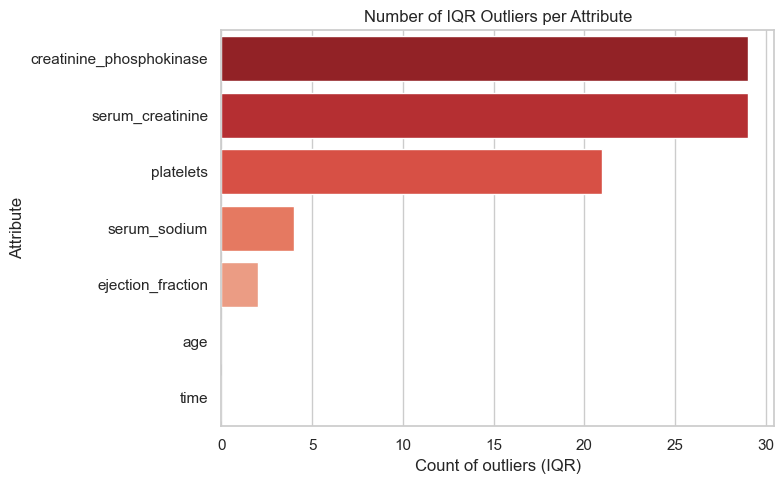

In [46]:
# Reset index so that attribute names and outlier counts are in separate columns
df_plot = iqr_counts.reset_index()
df_plot.columns = ["Attribute", "Outliers"]

plt.figure(figsize=(8,5))
sns.barplot(data=df_plot, x="Outliers", y="Attribute", hue="Attribute", 
            dodge=False, palette="Reds_r", legend=False)
plt.title("Number of IQR Outliers per Attribute")
plt.xlabel("Count of outliers (IQR)")
plt.ylabel("Attribute")
plt.tight_layout()
plt.show()

<Figure size 350x500 with 0 Axes>

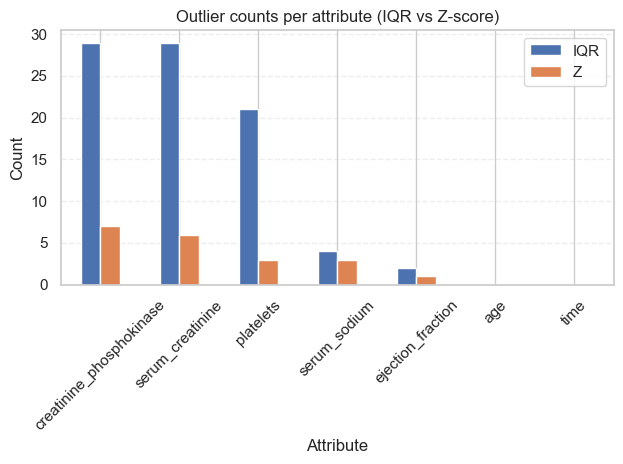

In [48]:
# barplot IQR vs Z
z_counts = pd.Series({c: z_masks[c].sum() for c in z_masks}).sort_values(ascending=False)
comp = pd.DataFrame({"IQR": iqr_counts, "Z": z_counts}).fillna(0).head(top_k)

plt.figure(figsize=(min(18, 0.5*len(comp)), 5))
ax = comp.plot(kind="bar", rot=45)
ax.set_title("Outlier counts per attribute (IQR vs Z-score)")
ax.set_ylabel("Count")
ax.set_xlabel("Attribute")
ax.grid(axis="y", linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()